<a href="https://colab.research.google.com/github/mahfuzaakter/fordatascience/blob/main/setur_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyreadstat pandas linearmodels matplotlib seaborn

import os
import re
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error
import seaborn as sns
from google.colab import files
from linearmodels import PanelOLS, RandomEffects

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 666.4/666.4 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 6.9 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data22.14.11.csv to data22.14.11.csv


In [ ]:
df=pd.read_csv(r"data22.14.11.csv")

/tmp/ipython-input-3685828151.py:1: DtypeWarning: Columns (5,8,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,28,29,30,31,32,33,34,61,63,64,65,67,70,71,73,74,75,76,77,78,79,80,81,82,84,85,86,87,88,89,90,91,93,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"data22.14.11.csv")


In [ ]:
df

,Unnamed: 0,hhid,cn,hn,shdistrict11,v00011,v01211,v02111,v02411,v02511,...,h11_1,h11b_1,h22_1,h31_1,h31b_1,h31c_1,hw57_1,hw70_1,hw71_1,hw73_1
0,0,1 3,1,3,4.0,BD6,37.0,1.0,barisal,rural,...,no,NaN,yes,"yes, last two weeks",yes,chest only,NaN,-103.0,-216.0,-220.0
1,1,1 7,1,7,4.0,BD6,25.0,1.0,barisal,rural,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1 10,1,10,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1 13,1,13,4.0,BD6,30.0,1.0,barisal,rural,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1 16,1,16,4.0,BD6,25.0,1.0,barisal,rural,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50138,50138,675 127,675,127,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50139,50139,675 130,675,130,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50140,50140,675 134,675,134,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50141,50141,675 137,675,137,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(50143, 96)

In [ ]:
print(df.index)
print(df.columns)

RangeIndex(start=0, stop=50143, step=1)
Index(['Unnamed: 0', 'hhid', 'cn', 'hn', 'shdistrict11', 'v00011', 'v01211',
       'v02111', 'v02411', 'v02511', 'v02611', 'v10611', 'v11311', 'v11511',
       'v11611', 'v11911', 'v13011', 'v15111', 'v16011', 'v16111', 'v19011',
       'ml10111', 'b5_0111', 'b6_0111', 'h11_111', 'h11b_111', 'h22_111',
       'h31_111', 'h31b_11', 'h31c_111', 'h31d_111', 'hw57_111', 'hw70_111',
       'hw71_111', 'hw73_111', 'district', 'ccp', 'rca', 'psu', 'div', 'res',
       'pres', 'hel', 'sdw', 'tgws', 'ttf', 'he', 'religion', 'sex', 'toilet',
       'tcf', 'wi', 'mb', 'ca', 'ad', 'dr', 'bs', 'fltw', 'cltw', 'srb', 'pcb',
       'h31d_1', 'al', 'height', 'weight', 'bmi', 'shdistrict', 'v000', 'v012',
       'v021', 'v024', 'v025', 'v026', 'v106', 'v113', 'v115', 'v116', 'v119',
       'v130', 'v151', 'v160', 'v161', 'v190', 'ml101', 'b5_01', 'b6_01',
       'h11_1', 'h11b_1', 'h22_1', 'h31_1', 'h31b_1', 'h31c_1', 'hw57_1',
       'hw70_1', 'hw71_1', 'hw73_1

In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50143 entries, 0 to 50142
Data columns (total 96 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    50143 non-null  int64  
 1   hhid          50143 non-null  object 
 2   cn            50143 non-null  int64  
 3   hn            50143 non-null  int64  
 4   shdistrict11  17141 non-null  float64
 5   v00011        14826 non-null  object 
 6   v01211        14826 non-null  float64
 7   v02111        14826 non-null  float64
 8   v02411        14826 non-null  object 
 9   v02511        14826 non-null  object 
 10  v02611        14826 non-null  object 
 11  v10611        14826 non-null  object 
 12  v11311        14826 non-null  object 
 13  v11511        14826 non-null  object 
 14  v11611        14826 non-null  object 
 15  v11911        14826 non-null  object 
 16  v13011        14826 non-null  object 
 17  v15111        14826 non-null  object 
 18  v16011        14255 non-nu

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'cn'}>, <Axes: title={'center': 'hn'}>,
        <Axes: title={'center': 'shdistrict11'}>],
       [<Axes: title={'center': 'v01211'}>,
        <Axes: title={'center': 'v02111'}>,
        <Axes: title={'center': 'ml10111'}>,
        <Axes: title={'center': 'rca'}>],
       [<Axes: title={'center': 'psu'}>, <Axes: title={'center': 'mb'}>,
        <Axes: title={'center': 'bs'}>, <Axes: title={'center': 'al'}>],
       [<Axes: title={'center': 'shdistrict'}>,
        <Axes: title={'center': 'v012'}>,
        <Axes: title={'center': 'v021'}>,
        <Axes: title={'center': 'v026'}>],
       [<Axes: title={'center': 'ml101'}>,
        <Axes: title={'center': 'hw57_1'}>, <Axes: >, <Axes: >]],
      dtype=object)

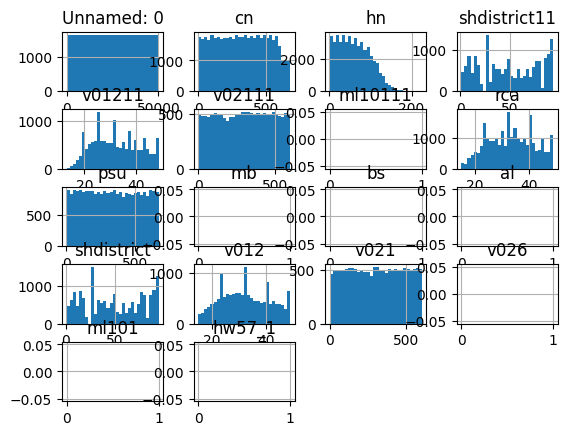

In [ ]:
df.hist(bins=30)

<Axes: >

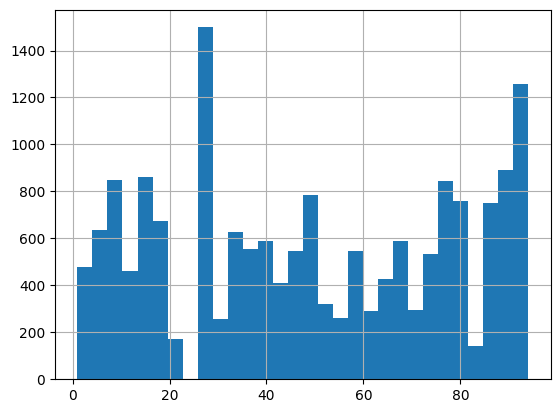

In [ ]:
df['shdistrict'].hist(bins=30)

<Axes: >

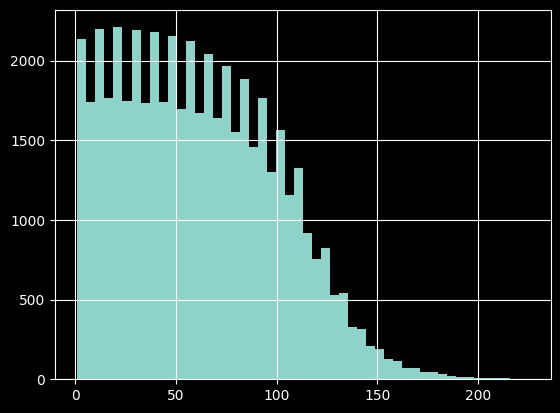

In [ ]:
# we can use dark_background
plt.style.use('dark_background')
df['hn'].hist(bins=50)

<Axes: xlabel='shdistrict'>

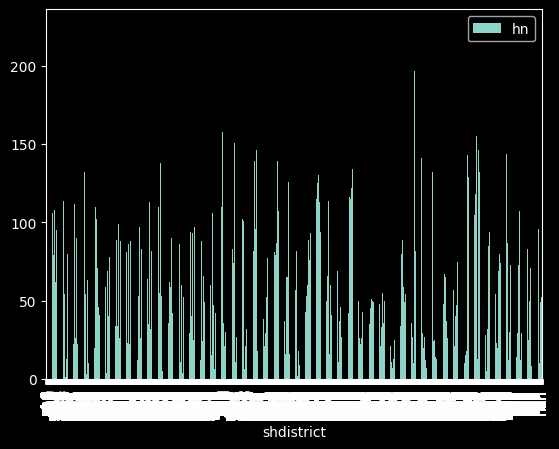

In [ ]:
df.plot.bar(x='shdistrict', y='hn')

<Axes: >

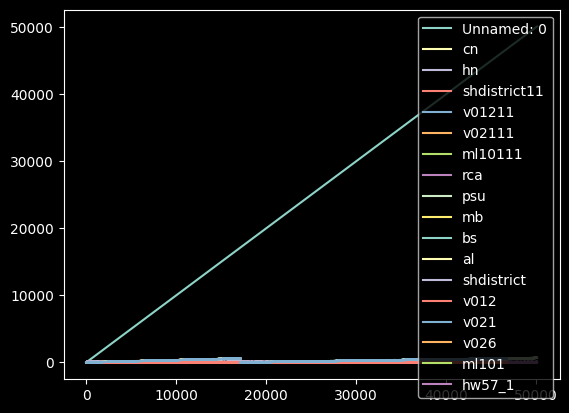

In [ ]:
df.plot()

<Axes: xlabel='shdistrict'>

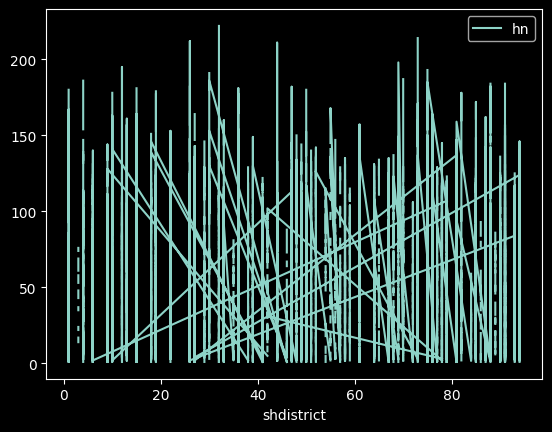

In [ ]:
df.plot.line(x='shdistrict', y='hn')

<Axes: xlabel='hn', ylabel='shdistrict'>

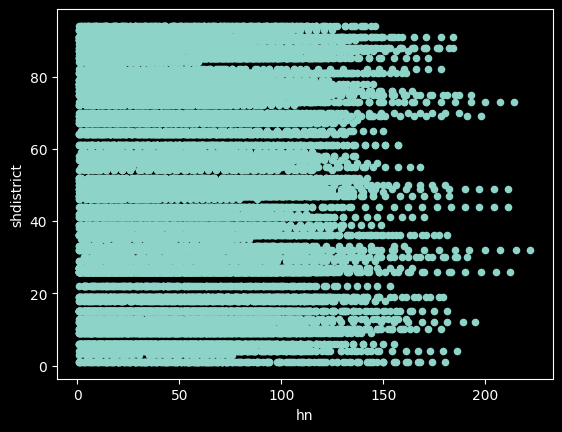

In [ ]:
df.plot.scatter(x='hn', y='shdistrict')

<Axes: xlabel='v012', ylabel='shdistrict'>

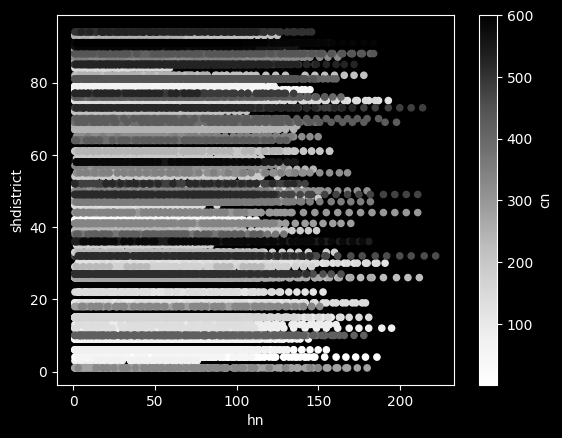

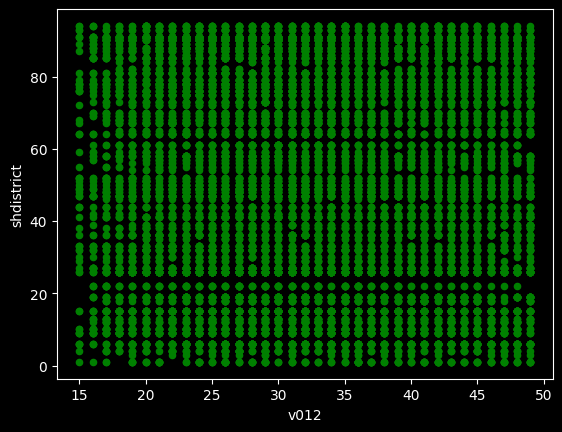

In [ ]:
df.plot.scatter(x='hn', y='shdistrict', c='cn')
df.plot.scatter(x='v012',y='shdistrict' , c='green'  )

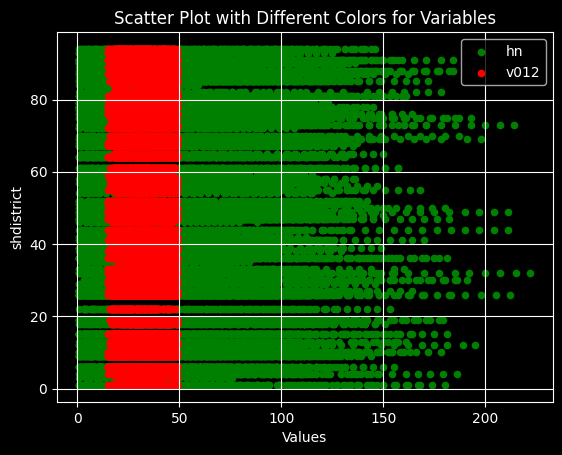

In [ ]:
fig, ax = plt.subplots()

# প্রথম ভেরিয়েবলের জন্য প্লট, সবুজ রঙে
df.plot.scatter(x='hn', y='shdistrict', c='green', label='hn', ax=ax)

# দ্বিতীয় ভেরিয়েবলের জন্য প্লট, লাল রঙে
df.plot.scatter(x='v012', y='shdistrict', c='red', label='v012', ax=ax)

# প্লটের শিরোনাম এবং লেবেল যোগ করা
plt.title('Scatter Plot with Different Colors for Variables')
plt.xlabel('Values')
plt.ylabel('shdistrict')
plt.legend() # লেজেন্ড প্রদর্শন
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))


<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

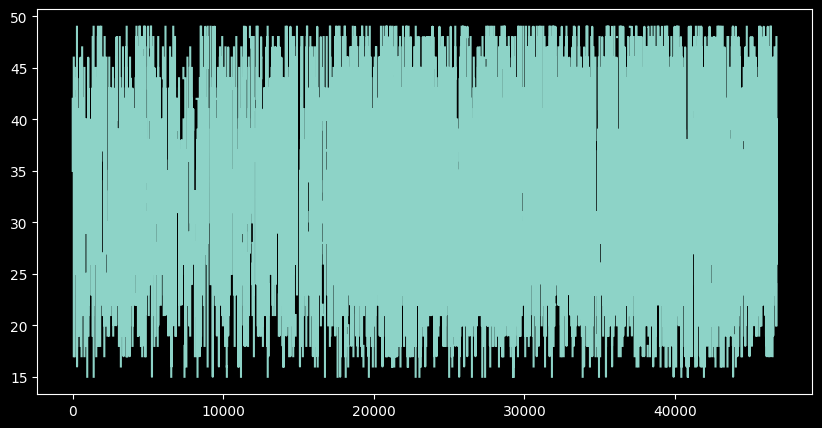

In [ ]:
plt.subplots(figsize=(10,5))
plt.plot( df['v012'])

<Axes: ylabel='Frequency'>

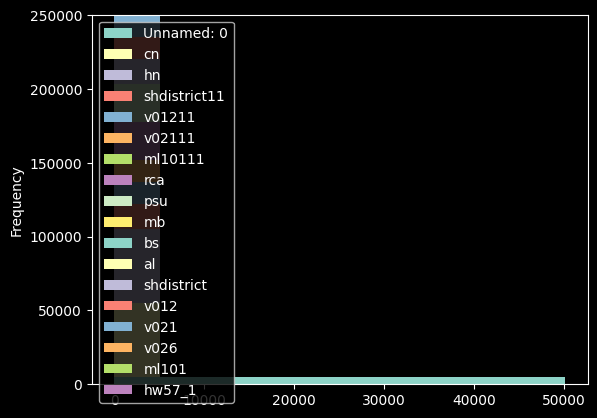

In [ ]:
df.plot.hist(stacked = True)

<Axes: >

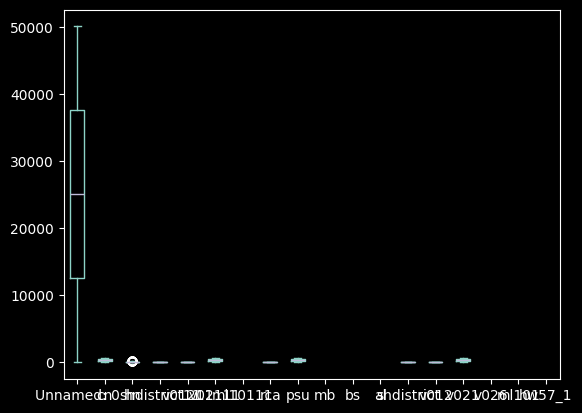

In [ ]:
df.plot.box()

In [ ]:
df.plot.bar(stacked=True, figsize=(10,5))

KeyboardInterrupt: 

# Task
Create a panel dataset from the data in the file "/content/Population of major cities.xlsx".

## Load the data

### Subtask:
Load the data from the Excel file into a pandas DataFrame.


**Reasoning**:
The subtask is to load the data from an Excel file into a pandas DataFrame. I will use `pd.read_excel` to read the data and store it in a variable named `df_cities` as instructed.



In [1]:
df_cities = pd.read_excel("/content/Population of major cities.xlsx")

NameError: name 'pd' is not defined

**Reasoning**:
The previous command failed because the pandas library was not imported. I need to import pandas as `pd` before reading the Excel file.



In [2]:
import pandas as pd
df_cities = pd.read_excel("/content/Population of major cities.xlsx")

**Reasoning**:
I have successfully loaded the data into the `df_cities` DataFrame. I need to display the head of the DataFrame to verify that the data was loaded correctly and the subtask is completed.



In [3]:
display(df_cities.head())

,Unnamed: 0,Name,Status,Adm.,Native,Population,Population.1,Population.2,Population.3
0,NaN,NaN,NaN,NaN,NaN,Census (C),Census (C),Census (Cf),Census (C)
1,NaN,NaN,NaN,NaN,NaN,1991-03-13 00:00:00,2001-01-22 00:00:00,2011-03-15 00:00:00,2022-06-14 00:00:00
2,NaN,Gazipur (incl. Tongi),City,GAZ,গাজীপুর,499463,759361,1592053,2677715
3,NaN,"Narayanganj (incl. Siddirganj, Kadamrasul)",City,NYG,নারায়ণগঞ্জ,401673,548268,709381,967951
4,NaN,Khulna,City,KHU,খুলনা,578919,770498,663342,719557


## Inspect the data

### Subtask:
Display the first few rows and the data types of the columns to understand the structure and content of the data.


**Reasoning**:
Display the first few rows and the data types of the columns to understand the structure and content of the data, as requested by the subtask instructions.



In [4]:
display(df_cities.head())
print(df_cities.info())

,Unnamed: 0,Name,Status,Adm.,Native,Population,Population.1,Population.2,Population.3
0,NaN,NaN,NaN,NaN,NaN,Census (C),Census (C),Census (Cf),Census (C)
1,NaN,NaN,NaN,NaN,NaN,1991-03-13 00:00:00,2001-01-22 00:00:00,2011-03-15 00:00:00,2022-06-14 00:00:00
2,NaN,Gazipur (incl. Tongi),City,GAZ,গাজীপুর,499463,759361,1592053,2677715
3,NaN,"Narayanganj (incl. Siddirganj, Kadamrasul)",City,NYG,নারায়ণগঞ্জ,401673,548268,709381,967951
4,NaN,Khulna,City,KHU,খুলনা,578919,770498,663342,719557


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    0 non-null      float64
 1   Name          418 non-null    object 
 2   Status        418 non-null    object 
 3   Adm.          418 non-null    object 
 4   Native        418 non-null    object 
 5   Population    420 non-null    object 
 6   Population.1  420 non-null    object 
 7   Population.2  420 non-null    object 
 8   Population.3  420 non-null    object 
dtypes: float64(1), object(8)
memory usage: 29.7+ KB
None


## Identify panel variables

### Subtask:
Determine which columns represent the entity (e.g., city) and time period (e.g., year) for the panel data.


**Reasoning**:
Analyze the column names and first few rows of the DataFrame to identify entity and time period columns.



In [5]:
display(df_cities.head())
print(df_cities.columns)

,Unnamed: 0,Name,Status,Adm.,Native,Population,Population.1,Population.2,Population.3
0,NaN,NaN,NaN,NaN,NaN,Census (C),Census (C),Census (Cf),Census (C)
1,NaN,NaN,NaN,NaN,NaN,1991-03-13 00:00:00,2001-01-22 00:00:00,2011-03-15 00:00:00,2022-06-14 00:00:00
2,NaN,Gazipur (incl. Tongi),City,GAZ,গাজীপুর,499463,759361,1592053,2677715
3,NaN,"Narayanganj (incl. Siddirganj, Kadamrasul)",City,NYG,নারায়ণগঞ্জ,401673,548268,709381,967951
4,NaN,Khulna,City,KHU,খুলনা,578919,770498,663342,719557


Index(['Unnamed: 0', 'Name', 'Status', 'Adm.', 'Native', 'Population',
       'Population.1', 'Population.2', 'Population.3'],
      dtype='object')


## Clean and transform the data

### Subtask:
Clean and transform the data: Handle missing values, inconsistent data types, and reshape the data into a panel format (long format).


**Reasoning**:
Clean and transform the data by handling missing values, inconsistent data types, and reshaping the data into a panel format (long format).



**Reasoning**:
The error indicates a mismatch in the number of columns after dropping 'Unnamed: 0' but before assigning the new column names. I need to adjust the logic for creating new column names to account for the dropped column.



**Reasoning**:
The error "KeyError: '[0, 1] not found in axis'" occurs because the index of the DataFrame has been reset after dropping rows, and the code is trying to drop rows with index labels 0 and 1 again. I need to reset the index after dropping the initial header rows before proceeding with column operations and melting.



**Reasoning**:
The KeyError persists because the `df_cities` variable is being reassigned after dropping the rows but *before* the code attempts to drop the rows with index labels 0 and 1. The dropping and resetting of the index should happen first, and then the column names should be processed on the DataFrame with the correct index. I need to reorder the operations.



**Reasoning**:
The `KeyError` persists because the `df_cities` DataFrame in the current state of the notebook no longer has index labels 0 and 1. The DataFrame was modified in previous attempts. I need to start from the original loaded DataFrame (`df_cities` from the load data step) and apply the dropping and renaming steps correctly. I will re-execute the drop and rename logic, ensuring the index is reset immediately after dropping the header rows.



**Reasoning**:
The `NameError` indicates that `df_original` was not defined because the line `df_original = pd.read_excel("/content/Population of major cities.xlsx")` was commented out in the previous attempt. I need to ensure `df_original` is correctly loaded before trying to access its columns and index.



**Reasoning**:
The `ValueError: invalid literal for int() with base 10: '1991-03-13'` indicates that the code is trying to convert the full date string (e.g., '1991-03-13') to an integer when it should only be extracting the year part. I need to modify the code to correctly extract only the year from the 'Year' column after melting before converting it to an integer.



In [12]:
# Re-load the original data to ensure the index is as expected
df_cities = pd.read_excel("/content/Population of major cities.xlsx")
df_original = pd.read_excel("/content/Population of major cities.xlsx") # Ensure df_original is defined

# Identify header rows and create new column names from the original DataFrame's first two rows
header_row1 = df_original.iloc[0]
header_row2 = df_original.iloc[1]

# Drop original header rows and 'Unnamed: 0' column first
df_cities = df_cities.drop([0, 1]).reset_index(drop=True)
df_cities = df_cities.drop(columns=['Unnamed: 0'])


new_columns = []
# Iterate through the columns of the DataFrame *after* dropping 'Unnamed: 0'
for col_idx, col_name in enumerate(df_cities.columns):
    if col_name in ['Name', 'Status', 'Adm.', 'Native']:
        new_columns.append(col_name.replace('.', '')) # Remove dot from 'Adm.'
    else:
        # Find the corresponding column in the original header rows
        # Need to use the column names from the current df_cities to find the correct index in the original header rows
        original_col_index_in_original_df = df_original.columns.get_loc(col_name) # Use col_name directly as it matches after dropping Unnamed: 0
        if original_col_index_in_original_df is not None:
             year_info = str(header_row2[original_col_index_in_original_df]).split('-')[0] # Get the year part by splitting the date string
             new_columns.append(f'Population_{year_info}')
        else:
             # Handle cases where the column name might not be found (shouldn't happen with this logic, but as a safeguard)
             new_columns.append(col_name) # Keep the existing column name if not found in original header


# Assign new column names
df_cities.columns = new_columns

# Melt the DataFrame to long format
df_panel = df_cities.melt(
    id_vars=['Name', 'Status', 'Adm', 'Native'],
    var_name='Year',
    value_name='Population'
)

# Convert 'Population' to numeric, coercing errors
df_panel['Population'] = pd.to_numeric(df_panel['Population'], errors='coerce')

# Extract year from 'Year' column and convert to numeric
df_panel['Year'] = df_panel['Year'].str.replace('Population_', '').astype(int)

# Drop rows with missing population values
df_panel.dropna(subset=['Population'], inplace=True)

display(df_panel.head())
print(df_panel.info())

/tmp/ipython-input-2163251522.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  year_info = str(header_row2[original_col_index_in_original_df]).split('-')[0] # Get the year part by splitting the date string


,Name,Status,Adm,Native,Year,Population
0,Gazipur (incl. Tongi),City,GAZ,গাজীপুর,1991,499463.0
1,"Narayanganj (incl. Siddirganj, Kadamrasul)",City,NYG,নারায়ণগঞ্জ,1991,401673.0
2,Khulna,City,KHU,খুলনা,1991,578919.0
3,Rangpur,City,RGP,রংপুর,1991,379168.0
4,Mymensingh (Nasirabad),City,MYM,ময়মনসিংহ,1991,298737.0


<class 'pandas.core.frame.DataFrame'>
Index: 1069 entries, 0 to 1671
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        1069 non-null   object 
 1   Status      1069 non-null   object 
 2   Adm         1069 non-null   object 
 3   Native      1069 non-null   object 
 4   Year        1069 non-null   int64  
 5   Population  1069 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 58.5+ KB
None


## Set the index

### Subtask:
Set the entity and time variables as the index of the DataFrame to create a proper panel data structure.


**Reasoning**:
Set the index of the DataFrame to be a MultiIndex using the 'Name' and 'Year' columns and display the head to verify the structure.



In [13]:
df_panel = df_panel.set_index(['Name', 'Year'])
display(df_panel.head())

,,Status,Adm,Native,Population
Name,Year,,,,
Gazipur (incl. Tongi),1991,City,GAZ,গাজীপুর,499463.0
"Narayanganj (incl. Siddirganj, Kadamrasul)",1991,City,NYG,নারায়ণগঞ্জ,401673.0
Khulna,1991,City,KHU,খুলনা,578919.0
Rangpur,1991,City,RGP,রংপুর,379168.0
Mymensingh (Nasirabad),1991,City,MYM,ময়মনসিংহ,298737.0


from matplotlib import pyplot as plt
_df_0['Population'].plot(kind='hist', bins=20, title='Population')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Adm').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 2454 (\N{BENGALI LETTER KHA}) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Matplotlib currently does not support Bengali natively.
  plt.savefig(
/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 2497 (\N{BENGALI VOWEL SIGN U}) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 2482 (\N{BENGALI LETTER LA}) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 2472 (\N{BENGALI LETTER NA}) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 2494 (\N{BENGALI VOWEL SIGN AA}) missing from fon

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Native').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Population'].plot(kind='line', figsize=(8, 4), title='Population')
plt.gca().spines[['top', 'right']].set_visible(False)

/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 2454 (\N{BENGALI LETTER KHA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 2497 (\N{BENGALI VOWEL SIGN U}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 2482 (\N{BENGALI LETTER LA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 2472 (\N{BENGALI LETTER NA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 2494 (\N{BENGALI VOWEL SIGN AA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/d

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Native'].value_counts()
    for x_label, grp in _df_4.groupby('Adm')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Adm')
_ = plt.ylabel('Native')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_5['Adm'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_5, x='Population', y='Adm', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 2455 (\N{BENGALI LETTER GA}) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Matplotlib currently does not support Bengali natively.
  plt.savefig(
/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 2494 (\N{BENGALI VOWEL SIGN AA}) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 2460 (\N{BENGALI LETTER JA}) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 2496 (\N{BENGALI VOWEL SIGN

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_6['Native'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_6, x='Population', y='Native', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

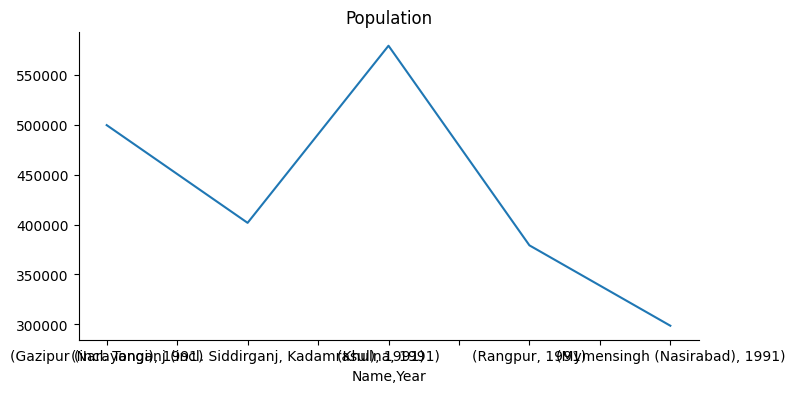

In [21]:
from matplotlib import pyplot as plt
_df_3['Population'].plot(kind='line', figsize=(8, 4), title='Population')
plt.gca().spines[['top', 'right']].set_visible(False)

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2454 (\N{BENGALI LETTER KHA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Matplotlib currently does not support Bengali natively.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2497 (\N{BENGALI VOWEL SIGN U}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2482 (\N{BENGALI LETTER LA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2472 (\N{BENGALI LETTER NA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2494 (\N{BENGALI VOWEL SIGN AA}) missing from font(s) Deja

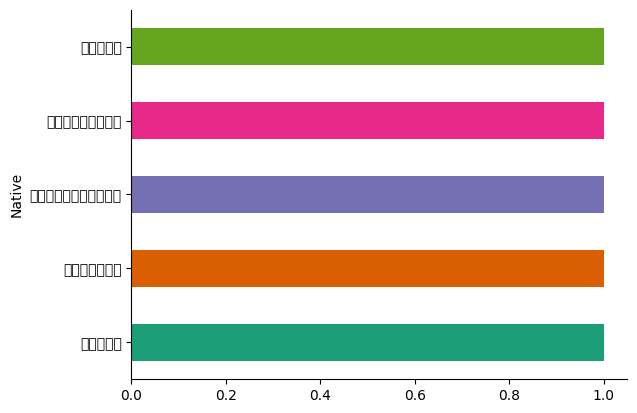

In [20]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Native').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

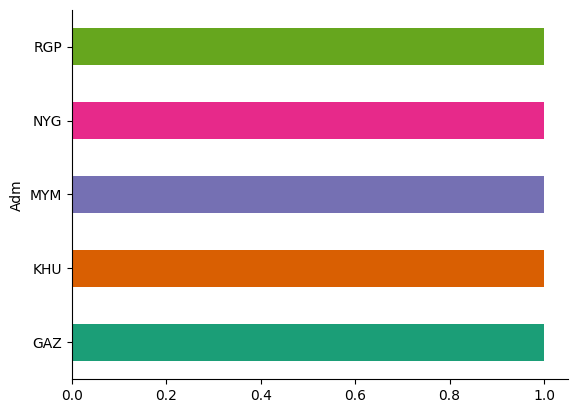

In [19]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Adm').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

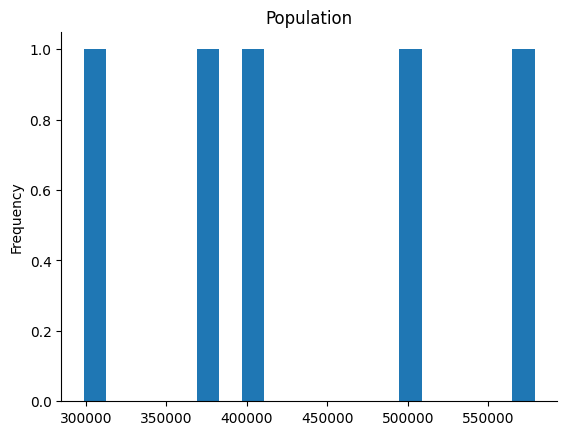

In [17]:
from matplotlib import pyplot as plt
_df_0['Population'].plot(kind='hist', bins=20, title='Population')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Perform exploratory analysis

### Subtask:
Visualize the data and calculate summary statistics to understand the trends and relationships in the panel data.


**Reasoning**:
Generate descriptive statistics for the `Population` column, create a line plot for selected cities' population trends, and create a box plot to visualize population distribution by status.



**Reasoning**:
The previous code failed because `plt` was not defined. I need to import `matplotlib.pyplot` as `plt`.



Descriptive Statistics for Population:


,Population
count,1.069000e+03
mean,6.500020e+04
std,1.309601e+05
min,2.872000e+03
25%,2.384200e+04
50%,3.481200e+04
75%,5.532300e+04
max,2.677715e+06


<Figure size 1200x600 with 0 Axes>

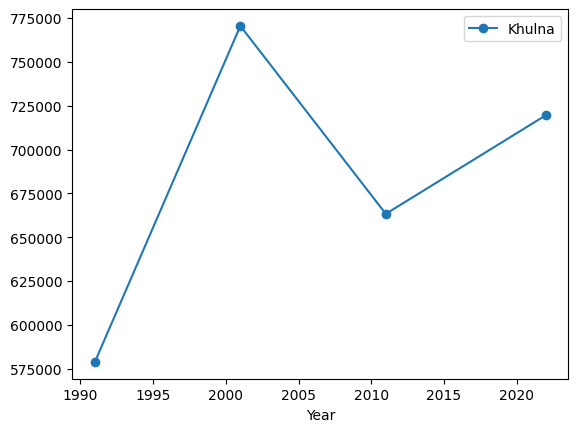

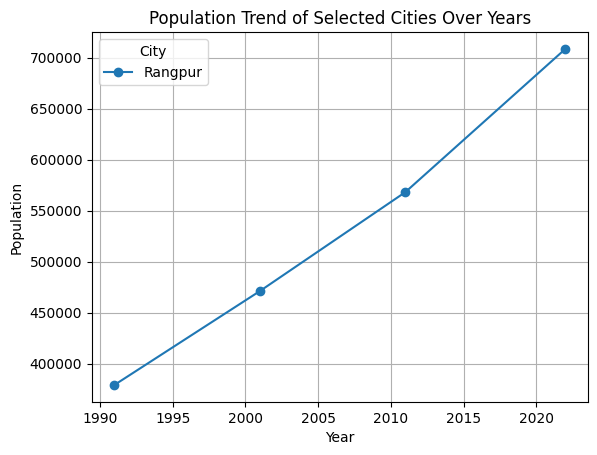

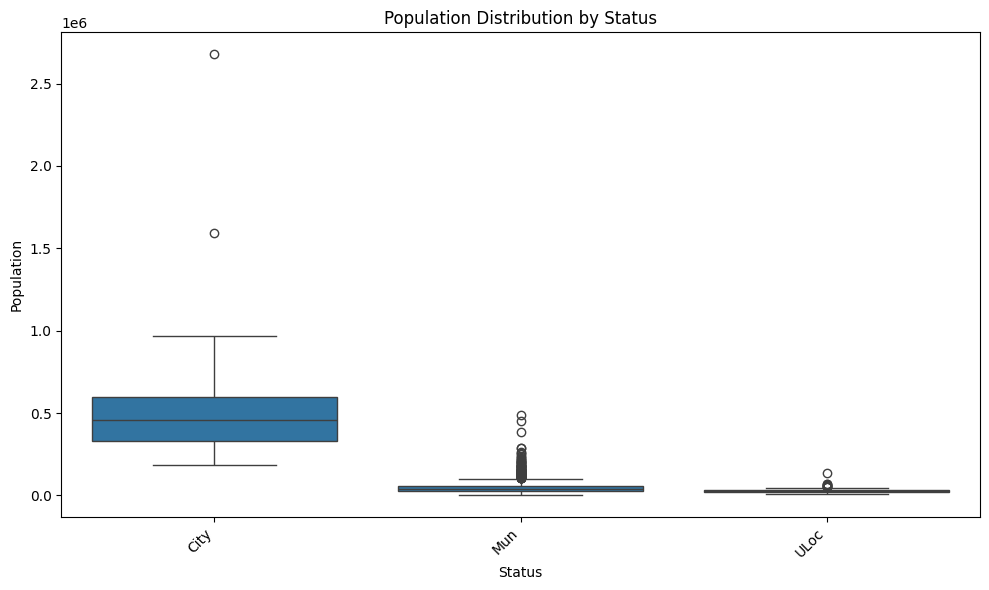

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Generate descriptive statistics for the Population column
print("Descriptive Statistics for Population:")
display(df_panel['Population'].describe())

# 2. Create a line plot showing the trend of Population over Year for a selected set of cities
# Select a few representative cities
selected_cities = ['Gazipur (incl. Tongi)', 'Khulna', 'Rangpur', 'Mymensingh (Nasirabad)']
# Find the actual city names in the index
available_cities = df_panel.index.get_level_values('Name').unique()
selected_cities_corrected = [city for city in selected_cities if city in available_cities]

# If no selected cities are found, select a few from the available ones
if not selected_cities_corrected:
    selected_cities_corrected = available_cities[:4].tolist() # Select first 4 available cities

df_selected_cities = df_panel.loc[selected_cities_corrected]

plt.figure(figsize=(12, 6))
for city in selected_cities_corrected:
    df_selected_cities.loc[city].plot(y='Population', marker='o', linestyle='-', label=city)

plt.title('Population Trend of Selected Cities Over Years')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(title='City')
plt.grid(True)
plt.show()

# 3. Create a box plot to visualize the distribution of Population across different Status categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Population', data=df_panel.reset_index())
plt.title('Population Distribution by Status')
plt.xlabel('Status')
plt.ylabel('Population')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The initial data contained header information spread across the first two rows, which required cleaning to create proper column names including the year information for population columns.
*   An 'Unnamed: 0' column with no data was present and needed to be removed.
*   Population data was initially read as 'object' type and required conversion to numeric after cleaning.
*   The dataset contains population data for major cities across several census years.
*   Descriptive statistics for the 'Population' column were generated, showing the distribution and key values (e.g., mean, standard deviation, min, max).
*   A line plot visualized the population trends over years for selected cities, indicating varying growth patterns.
*   A box plot illustrated the distribution of population across different 'Status' categories, revealing differences in population sizes based on status.

### Insights or Next Steps

*   The data is now in a panel format, suitable for time-series analysis on individual cities or cross-sectional analysis across cities at specific time points.
*   Further analysis could explore the factors driving population changes in these cities or compare growth rates between cities of different statuses.


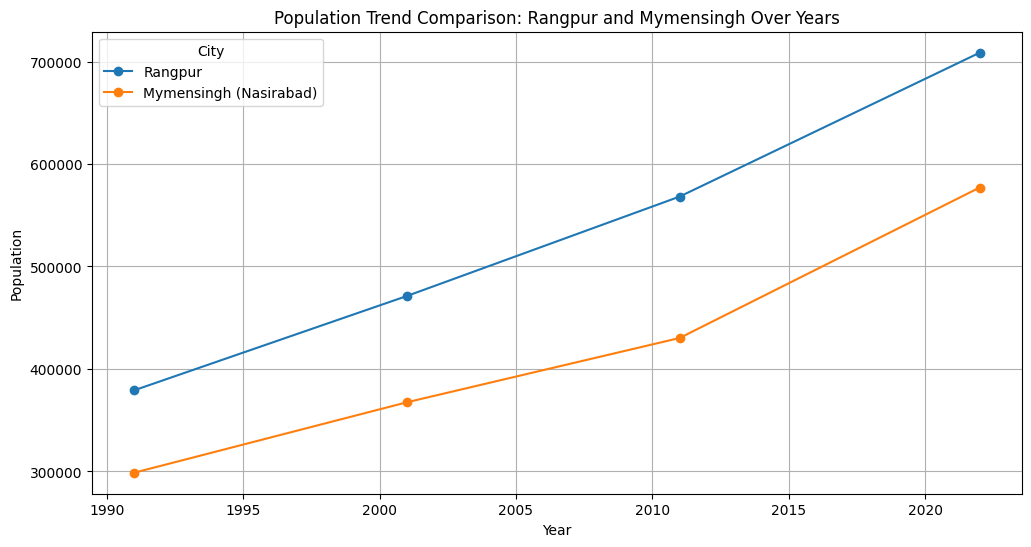

In [25]:
import matplotlib.pyplot as plt

# Define the cities to visualize
cities_to_visualize = ['Rangpur', 'Mymensingh\xa0(Nasirabad)'] # Use the exact strings from the index

plt.figure(figsize=(12, 6))

# Plot the trend for each city
for city in cities_to_visualize:
    if city in df_panel.index.get_level_values('Name'):
        df_city_trend = df_panel.loc[city]
        plt.plot(df_city_trend.index, df_city_trend['Population'], marker='o', linestyle='-', label=city)
    else:
        print(f"City '{city}' not found in the DataFrame index.")


plt.title('Population Trend Comparison: Rangpur and Mymensingh Over Years')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(title='City')
plt.grid(True)
plt.show()

In [26]:
display(df_cities.describe())

,Name,Status,Adm,Native,Population_1991,Population_2001,Population_2011,Population_2022
count,418,418,418,418,418,418,418,418
unique,405,3,64,404,148,218,287,418
top,Durgapur,Mun,CHI,ফুলবাড়িয়া,...,...,...,18021
freq,2,295,30,2,271,201,131,1


from matplotlib import pyplot as plt
_df_7['Population_2022'].plot(kind='hist', bins=20, title='Population_2022')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_8.groupby('Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_9.groupby('Status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_10.groupby('Adm').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 2475 (\N{BENGALI LETTER PHA}) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Matplotlib currently does not support Bengali natively.
  plt.savefig(
/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 2497 (\N{BENGALI VOWEL SIGN U}) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 2482 (\N{BENGALI LETTER LA}) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 2476 (\N{BENGALI LETTER BA}) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 2494 (\N{BENGALI VOWEL SIGN AA}) missing from fon

from matplotlib import pyplot as plt
import seaborn as sns
_df_11.groupby('Native').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Population_2022'].plot(kind='line', figsize=(8, 4), title='Population_2022')
plt.gca().spines[['top', 'right']].set_visible(False)

UFuncTypeError: ufunc 'greater' did not contain a loop with signature matching types (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.StrDType'>) -> None

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Status'].value_counts()
    for x_label, grp in _df_13.groupby('Name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Name')
_ = plt.ylabel('Status')

UFuncTypeError: ufunc 'greater' did not contain a loop with signature matching types (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.StrDType'>) -> None

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Adm'].value_counts()
    for x_label, grp in _df_14.groupby('Status')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Status')
_ = plt.ylabel('Adm')

UFuncTypeError: ufunc 'greater' did not contain a loop with signature matching types (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.StrDType'>) -> None

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Native'].value_counts()
    for x_label, grp in _df_15.groupby('Adm')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Adm')
_ = plt.ylabel('Native')

UFuncTypeError: ufunc 'greater' did not contain a loop with signature matching types (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.StrDType'>) -> None

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Population_1991'].value_counts()
    for x_label, grp in _df_16.groupby('Native')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Native')
_ = plt.ylabel('Population_1991')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='Population_2022', y='Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='Population_2022', y='Status', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Adm'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='Population_2022', y='Adm', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 2475 (\N{BENGALI LETTER PHA}) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Matplotlib currently does not support Bengali natively.
  plt.savefig(
/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 2497 (\N{BENGALI VOWEL SIGN U}) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 2482 (\N{BENGALI LETTER LA}) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 2476 (\N{BENGALI LETTER BA}

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['Native'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='Population_2022', y='Native', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

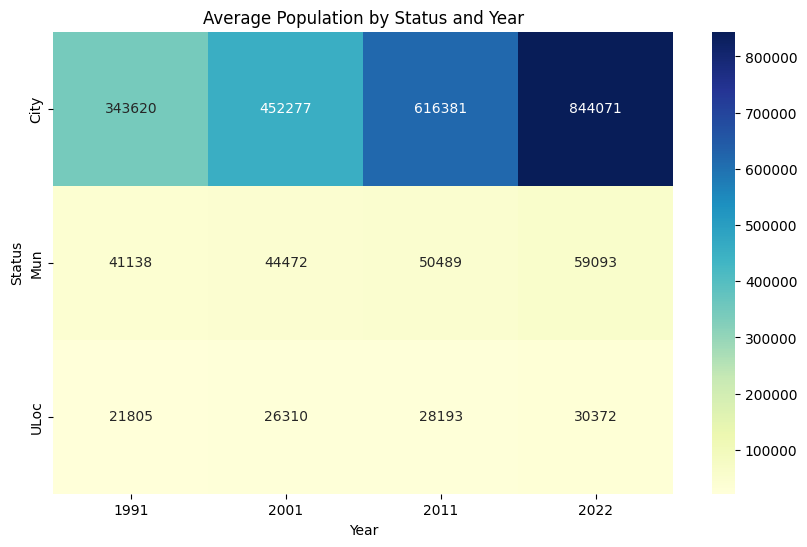

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the aggregated data to create a matrix suitable for heatmap
heatmap_data = df_aggregated.pivot(index='Status', columns='Year', values='Population')

# Generate the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")

plt.title('Average Population by Status and Year')
plt.xlabel('Year')
plt.ylabel('Status')
plt.show()

In [30]:
# Calculate percentage change in population by status over the years
df_aggregated['Population_Change'] = df_aggregated.groupby('Status')['Population'].pct_change() * 100

display(df_aggregated)

,Status,Year,Population,Population_Change
0,City,1991,343619.777778,NaN
1,City,2001,452277.000000,31.621353
2,City,2011,616381.333333,36.284032
3,City,2022,844070.777778,36.939705
4,Mun,1991,41137.708661,NaN
5,Mun,2001,44472.324873,8.105984
6,Mun,2011,50488.578947,13.528085
7,Mun,2022,59093.427119,17.043158
8,ULoc,1991,21804.636364,NaN
9,ULoc,2001,26309.545455,20.660327


from matplotlib import pyplot as plt
df_aggregated['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_aggregated['Population'].plot(kind='hist', bins=20, title='Population')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_aggregated['Population_Change'].plot(kind='hist', bins=20, title='Population_Change')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df_aggregated.groupby('Status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_aggregated.plot(kind='scatter', x='Year', y='Population', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_aggregated.plot(kind='scatter', x='Population', y='Population_Change', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Population']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_aggregated.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Status')):
  _plot_series(series, series_name, i)
  fig.legend(title='Status', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Population')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Population_Change']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_aggregated.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Status')):
  _plot_series(series, series_name, i)
  fig.legend(title='Status', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Population_Change')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_aggregated.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Status')):
  _plot_series(series, series_name, i)
  fig.legend(title='Status', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df_aggregated['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_aggregated['Population'].plot(kind='line', figsize=(8, 4), title='Population')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_aggregated['Population_Change'].plot(kind='line', figsize=(8, 4), title='Population_Change')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_aggregated['Status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_aggregated, x='Year', y='Status', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_aggregated['Status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_aggregated, x='Population', y='Status', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_aggregated['Status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_aggregated, x='Population_Change', y='Status', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

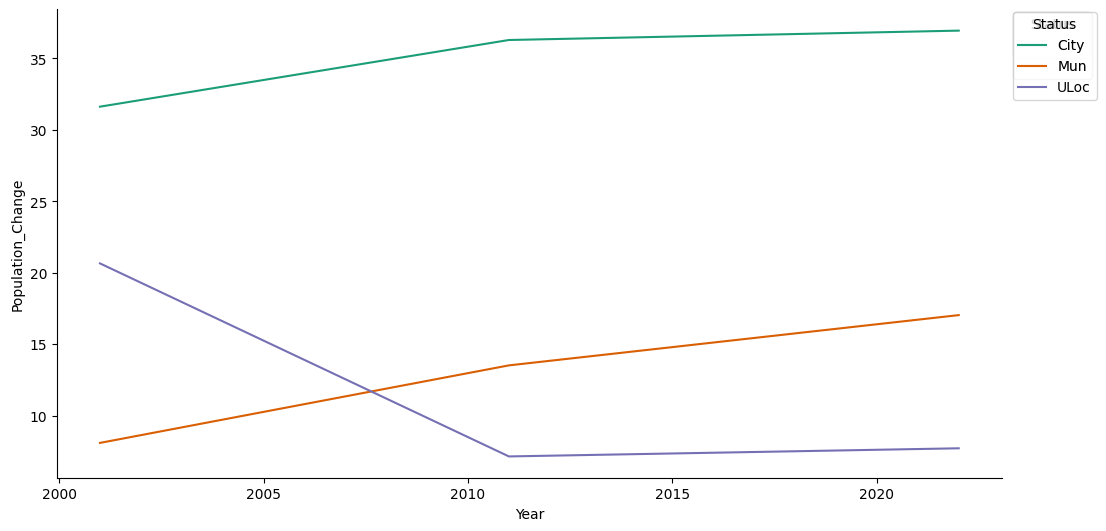

In [31]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Population_Change']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_aggregated.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Status')):
  _plot_series(series, series_name, i)
  fig.legend(title='Status', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Population_Change')

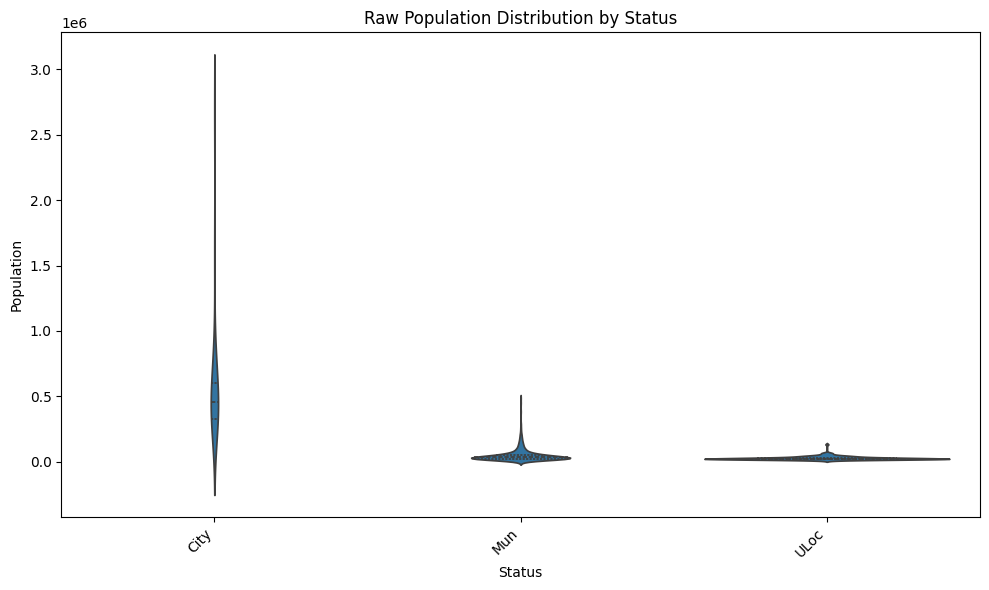

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.violinplot(x='Status', y='Population', data=df_panel.reset_index(), inner='quartile')
plt.title('Raw Population Distribution by Status')
plt.xlabel('Status')
plt.ylabel('Population')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [27]:
# Group by Status and Year and calculate the mean population
df_aggregated = df_panel.groupby(['Status', 'Year'])['Population'].mean().reset_index()

display(df_aggregated.head())
print(df_aggregated.info())

,Status,Year,Population
0,City,1991,343619.777778
1,City,2001,452277.000000
2,City,2011,616381.333333
3,City,2022,844070.777778
4,Mun,1991,41137.708661


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Status      12 non-null     object 
 1   Year        12 non-null     int64  
 2   Population  12 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 420.0+ bytes
None


from matplotlib import pyplot as plt
_df_21['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22['Population'].plot(kind='hist', bins=20, title='Population')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_23.groupby('Status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24.plot(kind='scatter', x='Year', y='Population', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Population']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Status')):
  _plot_series(series, series_name, i)
  fig.legend(title='Status', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Population')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_26.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Status')):
  _plot_series(series, series_name, i)
  fig.legend(title='Status', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_27['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_28['Population'].plot(kind='line', figsize=(8, 4), title='Population')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_29['Status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_29, x='Year', y='Status', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_30['Status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_30, x='Population', y='Status', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

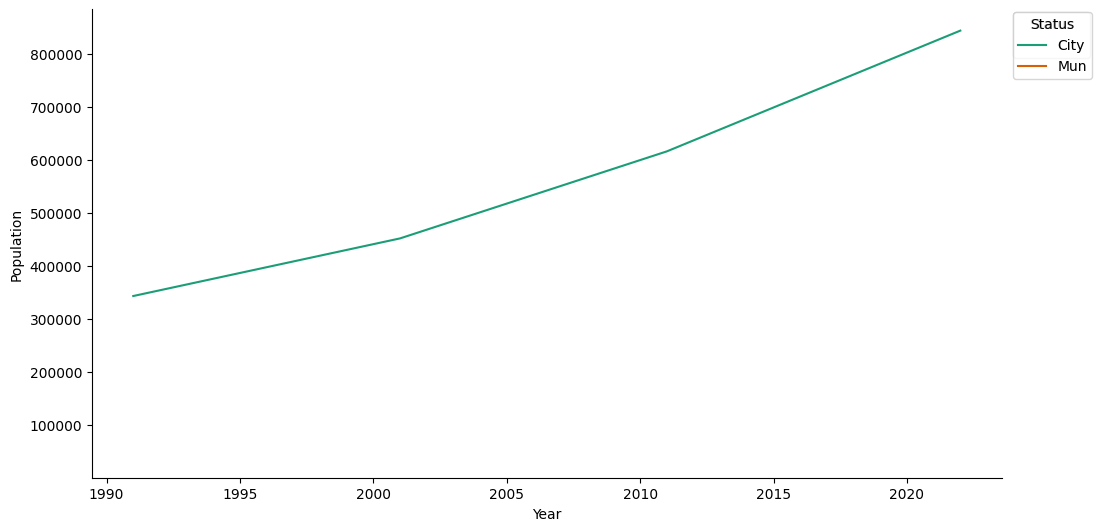

In [28]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Population']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Status')):
  _plot_series(series, series_name, i)
  fig.legend(title='Status', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Population')